In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
X =iris["data"][:, (2,3)]
y =iris["target"]

In [5]:
# Add a bias term of 0
import numpy as np
X_with_bias = np.c_[np.ones([len(X),1]) ,X]
np.random.seed(2042)
# the easiest option to plit the dataset is to use train_test_split()

In [6]:
test_ratio = 0.2
validation_ratio=0.2
total_size = len(X_with_bias)
total_size

150

In [28]:
test_size =int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size
rnd_indices = np.random.permutation(total_size)
X_train = X_with_bias[rnd_indices[:train_size]]
y_train =y[rnd_indices[:train_size]]
X_valid= X_with_bias[rnd_indices[train_size:-test_size]]
y_valid=y[rnd_indices[train_size:-test_size]]
X_test=X_with_bias[rnd_indices[-test_size:]]
y_test =y[rnd_indices[-test_size:]]

In [29]:
rnd_indices[:train_size]

array([120,   2, 119,  76,  16, 107, 110,  84, 140,  29, 134,  96,  34,
       127,  19,  70, 116,  47,  12,  28, 106,  95, 113, 103, 114,  50,
        39, 131,  40,  65, 123,  67,  35,  93,  36,  41, 136, 102,  78,
        66,  26,  71,  54,  89,  48,  18,  94,  79, 109,  52,  58,  44,
        68, 138,  81,  72,  83,  59, 128,   6, 145,  56,  87, 147,  90,
        15,  43,   0,  57,  91, 125,  22,  20, 143,  80, 108,   1, 118,
       142,  88,   9, 115,  46,  73,  64,  42,   4,  63, 149, 139])

In [30]:
 X_with_bias[rnd_indices[:train_size]]

array([[1. , 5.7, 2.3],
       [1. , 1.3, 0.2],
       [1. , 5. , 1.5],
       [1. , 4.8, 1.4],
       [1. , 1.3, 0.4],
       [1. , 6.3, 1.8],
       [1. , 5.1, 2. ],
       [1. , 4.5, 1.5],
       [1. , 5.6, 2.4],
       [1. , 1.6, 0.2],
       [1. , 5.6, 1.4],
       [1. , 4.2, 1.3],
       [1. , 1.5, 0.2],
       [1. , 4.9, 1.8],
       [1. , 1.5, 0.3],
       [1. , 4.8, 1.8],
       [1. , 5.5, 1.8],
       [1. , 1.4, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.4, 0.2],
       [1. , 4.5, 1.7],
       [1. , 4.2, 1.2],
       [1. , 5. , 2. ],
       [1. , 5.6, 1.8],
       [1. , 5.1, 2.4],
       [1. , 4.7, 1.4],
       [1. , 1.5, 0.2],
       [1. , 6.4, 2. ],
       [1. , 1.3, 0.3],
       [1. , 4.4, 1.4],
       [1. , 4.9, 1.8],
       [1. , 4.1, 1. ],
       [1. , 1.2, 0.2],
       [1. , 3.3, 1. ],
       [1. , 1.3, 0.2],
       [1. , 1.3, 0.3],
       [1. , 5.6, 2.4],
       [1. , 5.9, 2.1],
       [1. , 4.5, 1.5],
       [1. , 4.5, 1.5],
       [1. , 1.6, 0.4],
       [1. , 4. 

In [31]:
X_with_bias[[82]]

array([[1. , 3.9, 1.2]])

In [32]:
X_with_bias[82]

array([1. , 3.9, 1.2])

In [33]:
y_train[:10]

array([2, 0, 2, 1, 0, 2, 2, 1, 2, 0])

In [34]:
def to_one_hot(y):
    n_classes = y.max()+1
    m=len(y)
    Y_one_hot = np.zeros((m, n_classes))
    for i in range(len(Y_one_hot)):
        Y_one_hot[i][y[i]] =1
    return Y_one_hot

# np.arange()は、NumPyの関数であり、指定された範囲内の連続した数値を生成するために
# 使用されます。arange()関数は、NumPy配列を返すことが特徴です。

# result = np.arange(start, stop, step)

In [35]:
to_one_hot(y_train[:10])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [36]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [37]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [43]:
n_inputs=X_train.shape[1] # X_train.shape[1]は列数
                          # ==3(2 features plus the bias term)
n_outputs = len(np.unique(y_train)) # 3

In [44]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
Theta = np.random.randn(n_inputs, n_outputs)
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 ==0:
        loss = -np.mean(np.sum(Y_train_one_hot*np.log(Y_proba +epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta- eta*gradients

0 5.232127732364492
500 0.8986833239311411
1000 0.738160715236837
1500 0.6384628920514254
2000 0.5729553890260786
2500 0.5267835577984198
3000 0.4922230567877599
3500 0.4651170151306498
4000 0.44308694532156867
4500 0.42468491988272
5000 0.4089796731297377


In [45]:
Theta

array([[ 2.81833579, -0.71115381, -3.00717776],
       [ 0.2511653 ,  1.32961885,  1.092314  ],
       [-0.60841165,  0.52144937,  2.66497185]])

In [46]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict ==y_valid)
accuracy_score

0.9333333333333333

In [47]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
Theta = np.random.randn(n_inputs, n_outputs)
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 ==0:
        loss = -np.mean(np.sum(Y_train_one_hot*np.log(Y_proba +epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta- eta*gradients

0 1.7610762700300087
500 0.39333764464136645
1000 0.31570618041247883
1500 0.2749057642001612
2000 0.24787047357749528
2500 0.22813098483769553
3000 0.21291539090911735
3500 0.200760974582152
4000 0.19079662548017037
4500 0.18246176313863458
5000 0.1753757420515651


In [48]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict ==y_valid)
accuracy_score

0.9666666666666667

In [110]:
# Add early stopping

eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 #regulartization hyperparameter
best_loss = np.infty #無限大
Theta = np.random.randn(n_inputs, n_outputs)
print(Theta)
check = 0

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients =  1/m * X_train.T.dot(error)+np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]] #行方向で結合
    Theta = Theta- eta*gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot*np.log(Y_proba +epsilon), axis=1))
    l2_loss = 1/2 *np.sum(np.square(Theta[:1]))
    loss = xentropy_loss +alpha *l2_loss
    if iteration % 500 ==0:
        print(iteration, loss)
    if loss<best_loss:
        best_loss = loss
        check= 0
    else:
        check += 1
        if check >10 :
            print(iteration-check, best_loss)
            print(iteration, loss, "early stopping")
            break
        else:
            pass
            

    
    

[[-0.33751742  0.13883167 -0.31404524]
 [ 0.29729539  0.36572442  0.49421412]
 [-0.20365984  0.35618789  0.09861329]]
0 0.9726054360208511
98 0.778602408412568
109 0.7799044632154428 early stopping


In [111]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9

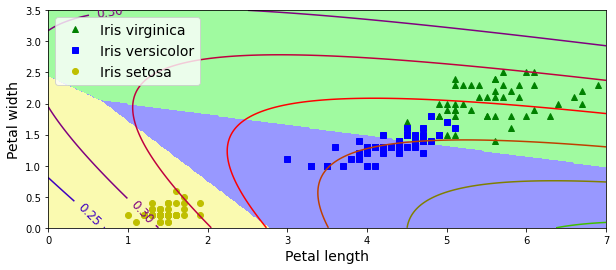

In [112]:
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()